In [1]:
from torchvision import datasets
from torchvision.transforms import transforms

### Preprocessing

In [2]:
# !curl -O http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
# !curl -O http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
# !curl -O http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
# !curl -O http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz


In [3]:
# !gunzip train-images-idx3-ubyte.gz
# !gunzip train-labels-idx1-ubyte.gz
# !gunzip t10k-images-idx3-ubyte.gz
# !gunzip t10k-labels-idx1-ubyte.gz

In [4]:
import struct
import numpy as np
import torch
from torch.utils.data import Dataset

class FashionMNISTDataset(Dataset):
    def __init__(self, image_path, label_path, transform=None):
        """
        Custom dataset to read Fashion-MNIST .ubyte files
        :param image_path: Path to the images .ubyte file
        :param label_path: Path to the labels .ubyte file
        :param transform: Optional image transformations (e.g., normalization, augmentation)
        """
        self.images = self._read_images(image_path)
        self.labels = self._read_labels(label_path)
        self.transform = transform

    def _read_images(self, file_path):
        """Reads the .ubyte image file and returns a tensor."""
        with open(file_path, "rb") as f:
            magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
            assert magic == 2051, "Invalid image file"
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 1, rows, cols)  # (N, 1, 28, 28)
        return torch.tensor(data, dtype=torch.float32) / 255.0  # Normalize to [0,1]

    def _read_labels(self, file_path):
        """Reads the .ubyte label file and returns a tensor."""
        with open(file_path, "rb") as f:
            magic, num = struct.unpack(">II", f.read(8))
            assert magic == 2049, "Invalid label file"
            data = np.frombuffer(f.read(), dtype=np.uint8)
        return torch.tensor(data, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image, label = self.images[idx], self.labels[idx]
        if self.transform:
            image = self.transform(image)  # Apply transforms if provided
        return image, label


In [5]:
train_images_path = 'data/train-images-idx3-ubyte'
train_labels_path = 'data/train-labels-idx1-ubyte'
train_dataset = FashionMNISTDataset(train_images_path, train_labels_path)


In [6]:
test_images_path = "data/t10k-images-idx3-ubyte"
test_labels_path= "data/t10k-labels-idx1-ubyte"
test_dataset = FashionMNISTDataset(test_images_path, test_labels_path)


In [7]:
train_dataset.__getitem__(0)[0].shape

torch.Size([1, 28, 28])

### Training

In [8]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [33]:
in_channels = 1
image_size = 28
num_classes = 10
num_epoch = 50

In [34]:
from lenet import LeNet

model = LeNet(
    in_channels=in_channels,
    num_classes=num_classes,
)


In [35]:
from utils import ModelTrainer

trainer = ModelTrainer(model)

In [36]:

trained_model = trainer.train_pipe(train_loader, test_loader, num_epoch)

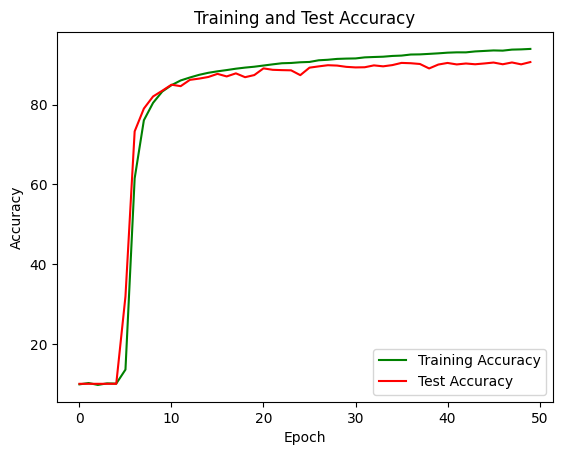

In [44]:
import matplotlib.pyplot as plt

x1 = trainer.train_epoch_accuracy
x2 = trainer.test_epoch_accuracy
y = [i for i in range(num_epoch)]

plt.plot(y,x1,'g',)
plt.plot(y,x2,'r', )
plt.legend([ 'Training Accuracy','Test Accuracy' ])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.show()    

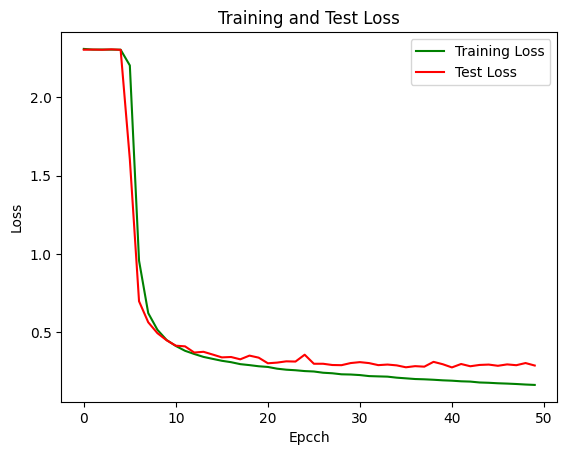

In [45]:

x1 = trainer.train_epoch_loss
x2 = trainer.test_epoch_loss
y = [i for i in range(num_epoch)]

plt.plot(y,x1,'g',)
plt.plot(y, x2,'r', )
plt.legend([ 'Training Loss','Test Loss' ])
plt.xlabel('Epcch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.show()    

In [46]:
torch.save(trained_model.state_dict(), f'model_{num_epoch}.pth')

In [47]:
trained_model.eval()

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (sigmoid1): Sigmoid()
  (avgpool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (sigmoid2): Sigmoid()
  (avgpool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (convlayer): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (sigmoid3): Sigmoid()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (sigmoid4): Sigmoid()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (fullyconnected): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=120, out

In [48]:
test_dataset[0][0].shape
image = test_dataset[0][0].unsqueeze(0)
label = test_dataset[0][1]
image, label

(tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0

In [49]:
def predict(model, image):
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        print(f"Predicted: {predicted.item()}")

In [50]:
predict(trained_model, image)

Predicted: 9
